In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python import keras
from tensorflow.python.keras.models import load_model

## Read the image

In [2]:
img = cv2.imread('Pleiades_Star_Cluster.jpg', 0) #gray image

In [3]:
img.shape

(532, 800)

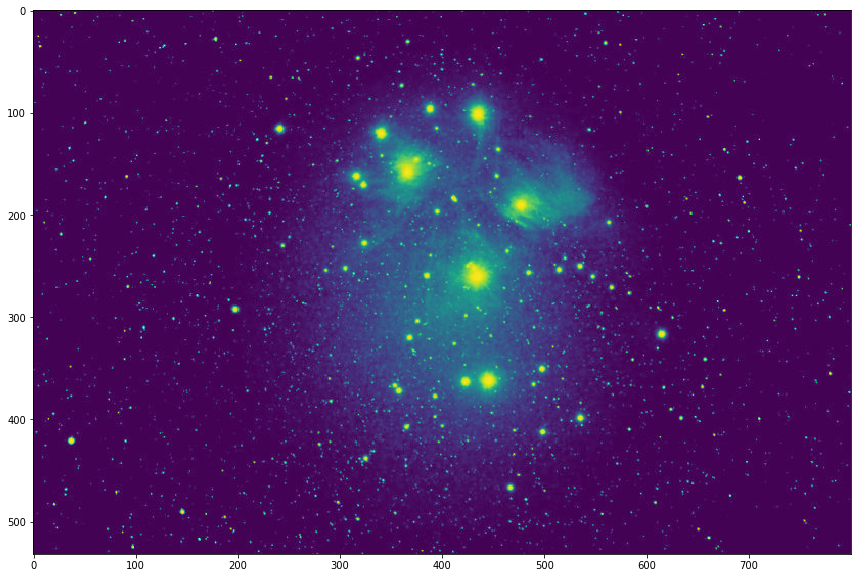

In [4]:
plt.figure(figsize=(20,10))
plt.imshow(img)
plt.show()

## Load and test the deep learning model

In [5]:
DL_model = load_model('DL_model.h5')

In [6]:
DL_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 20)        200       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 20)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4500)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 4501      
Total params: 4,701
Trainable params: 4,701
Non-trainable params: 0
_________________________________________________________________


In [7]:
DL_model.input_shape

(None, 30, 30, 1)

In [8]:
DL_model.output_shape

(None, 1)

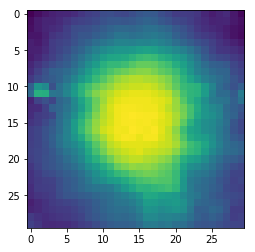

In [9]:
x_1 = cv2.imread('star.jpg', 0) 
plt.imshow(x_1)
plt.show()

In [10]:
x_1.shape

(30, 30)

In [11]:
x_r1 = np.array([x_1]).reshape(1,30,30,1)#/255

In [12]:
DL_model.predict(x_r1)[0][0] #probability to belong to class 1

1.0

In [13]:
DL_model.predict_classes(x_r1)[0][0] #class

1

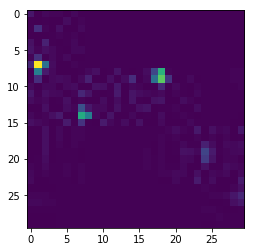

In [14]:
x_2 = cv2.imread('empty_space.jpg', 0) 
plt.imshow(x_2)
plt.show()

In [15]:
x_2.shape

(30, 30)

In [16]:
x_r2 = np.array([x_2]).reshape(1,30,30,1)#/255

In [17]:
DL_model.predict(x_r2)[0][0] #probability to belong to class 1

2.1890916e-20

In [18]:
DL_model.predict_classes(x_r2)[0][0] #class

0

## Define the object detector that uses the deep learning model

In [19]:
def object_detector(image, stepSize, windowSize):
    predictions = []
    for y in range(0, image.shape[0]-windowSize[0], stepSize):
        for x in range(0, image.shape[1]-windowSize[1], stepSize):
            window = image[y:y+windowSize[0], x:x+windowSize[1]]
            window_r = np.array([window]).reshape(1, windowSize[0], windowSize[1], 1)#/255
            p = DL_model.predict(window_r)[0][0]
            predictions.append([y, x, p])
    return np.array(predictions)

## Detect the objects and draw squares around

In [20]:
P = object_detector(img, 3, (30,30)) # objects position and probability

In [21]:
img_c = cv2.imread('Pleiades_Star_Cluster.jpg', 1) #color image

In [22]:
threshold = 0.95

In [23]:
boxes = []
for y,x,p in P:
    if p > threshold:
        boxes.append([x,y,x+30,y+30])

In [24]:
groupedBoxes = cv2.groupRectangles(boxes,1,0.03)
groupedBoxes[0]

array([[373,  82, 403, 112],
       [420,  86, 450, 116],
       [325, 105, 355, 135],
       [351, 140, 381, 170],
       [303, 150, 333, 180],
       [461, 175, 491, 205],
       [309, 213, 339, 243],
       [418, 245, 448, 274],
       [499, 238, 529, 268],
       [370, 243, 400, 273],
       [183, 278, 213, 308],
       [598, 302, 628, 332],
       [353, 305, 383, 335],
       [431, 347, 461, 377],
       [407, 348, 437, 378],
       [342, 356, 372, 386],
       [484, 397, 514, 427]], dtype=int32)

In [25]:
for x1,y1,x2,y2 in groupedBoxes[0]:
    cv2.rectangle(img_c, (x1,y1), (x2,y2), (0,255,0), 2)
    #text = "%.2f"%result[y1,x1] #convolution values
    #cv2.putText(img, text, (x1,y1-10), 0, 0.70, (255,0,0) ,2)

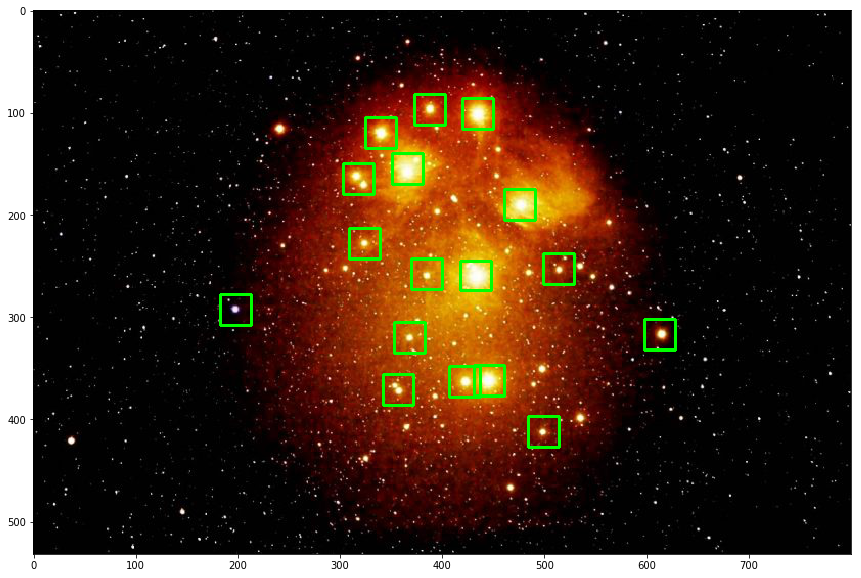

In [26]:
plt.figure(figsize=(20,10))
plt.imshow(img_c)
plt.show()

## Save the detected objects

In [27]:
i=0
for x1,y1,x2,y2 in groupedBoxes[0]:
    cv2.imwrite('detected_objects/object_%d.jpg'%i, img[y1:y2,x1:x2], params=None)
    i+=1